# Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn import svm
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)  

# Implement Visualization Function

In [3]:
def compute_bounds(X, ratio=1.1):
    x0_min = np.min(X[:, 0])
    x0_max = np.max(X[:, 0])
    x1_min = np.min(X[:, 1])
    x1_max = np.max(X[:, 1])
    x0_mid = (x0_max + x0_min) / 2
    x1_mid = (x1_max + x1_min) / 2
    x0_min = x0_mid - ratio * (x0_mid - x0_min)
    x0_max = x0_mid + ratio * (x0_max - x0_mid)
    x1_min = x1_mid - ratio * (x1_mid - x1_min)
    x1_max = x1_mid + ratio * (x1_max - x1_mid)
    return x0_min, x0_max, x1_min, x1_max
    

def visualize_data(X, y):
    X_pos = X[y == 1]
    X_neg = X[y == 0]
    plt.plot(X_pos[:, 0], X_pos[:, 1], 'k+', label='y = 1')
    plt.plot(X_neg[:, 0], X_neg[:, 1], 'ko', label='y = 0')
    plt.legend(loc='upper right')

    
def visualize_svm(classifier, canvas, scale=300):
    x0_min, x0_max, x1_min, x1_max = canvas 
    x0 = np.linspace(x0_min, x0_max, scale)
    x1 = np.linspace(x1_min, x1_max, scale)
    x0, x1 = np.meshgrid(x0, x1)
    grid_samples = np.hstack((x0.reshape(-1, 1), x1.reshape(-1, 1)))
    predictions = classifier.predict(grid_samples)
    plt.xlim(x0_min, x0_max)
    plt.ylim(x1_min, x1_max)
    plt.scatter(x0.reshape(-1)[predictions == 1], x1.reshape(-1)[predictions == 1], c='r', alpha=0.09, linewidths=0.1)
    plt.scatter(x0.reshape(-1)[predictions == 0], x1.reshape(-1)[predictions == 0], c='c', alpha=0.09, linewidths=0.1)

# SVM without Kernel
## Load and plot dataset 1

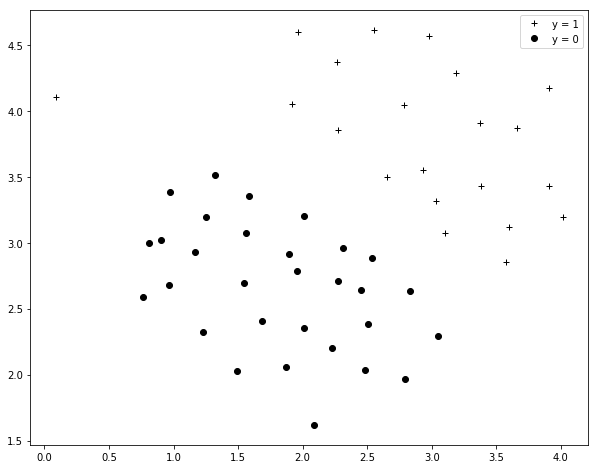

In [4]:
data = loadmat('./data/ex6data1.mat')
X1 = data['X']
y1 = data['y'].reshape(-1)
visualize_data(X1, y1)
plt.show()

## Apply SVM with C = 1

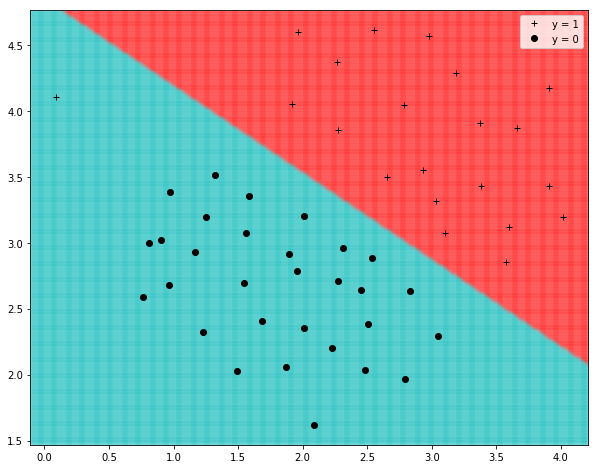

In [5]:
classifier = svm.SVC(C=1, kernel='linear')
classifier.fit(X1, y1)
# visualize result
visualize_data(X1, y1)
visualize_svm(classifier, compute_bounds(X1))
plt.show()

## Apply SVM with C = 100

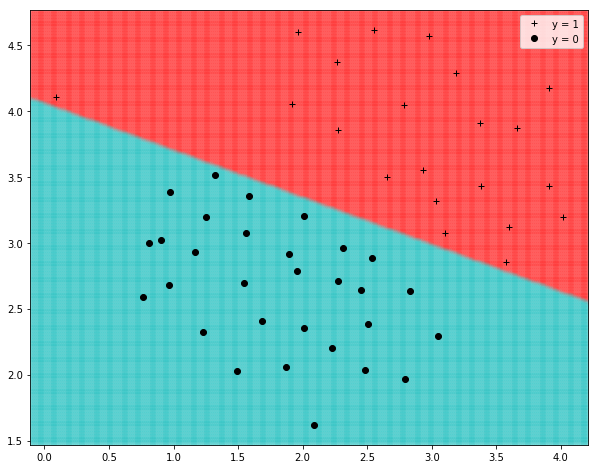

In [6]:
classifier = svm.SVC(C=100, kernel='linear')
classifier.fit(X1, y1)
# visualize result
visualize_data(X1, y1)
visualize_svm(classifier, compute_bounds(X1))
plt.show()

# SVM without Kernel
## Load and plot dataset 2

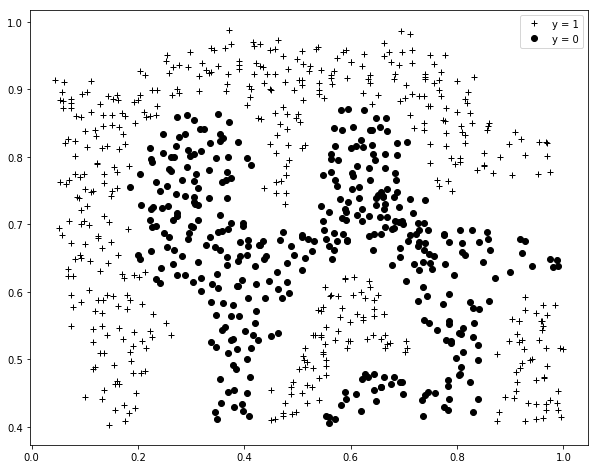

In [7]:
data = loadmat('./data/ex6data2.mat')
X2 = data['X']
y2 = data['y'].reshape(-1)
visualize_data(X2, y2)
plt.show()

## Apply SVM with Provided Parameters on Dataset 2

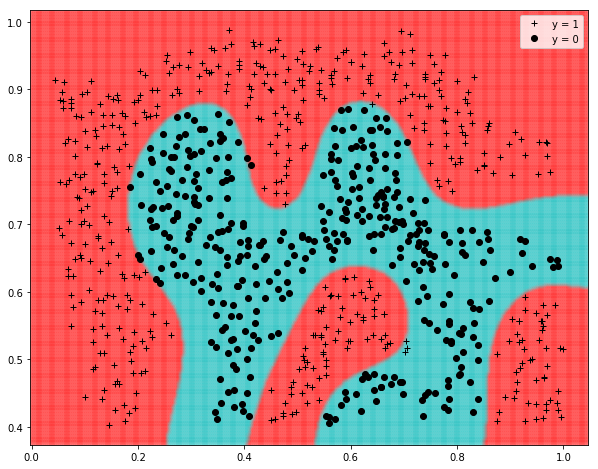

In [8]:
classifier = svm.SVC(C=1, kernel='rbf', gamma=50)
# note that rbf in sklearn is exp(-gamma * (x - L(x)) ** 2)
classifier.fit(X2, y2)
# visualize result
visualize_data(X2, y2)
visualize_svm(classifier, compute_bounds(X2))
plt.show()

## Load and plot dataset 3

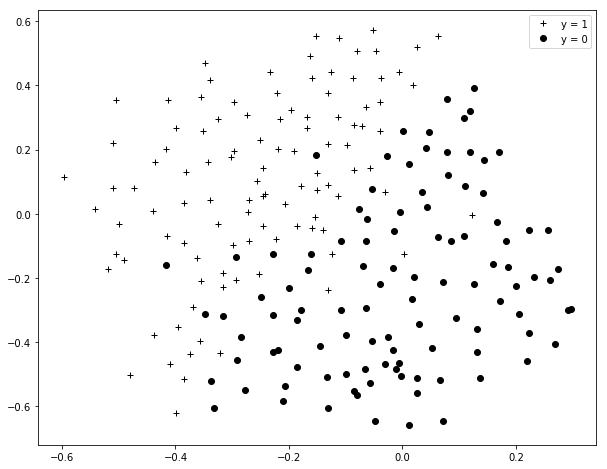

In [9]:
data = loadmat('./data/ex6data3.mat')

X3 = data['X']
y3 = data['y'].reshape(-1)
visualize_data(X3, y3)
plt.show()

## Tune SVM on Dataset 3

In [10]:
# shuffle data
idx = np.arange(X3.shape[0])
np.random.shuffle(idx)
X3 = X3[idx]
y3 = y3[idx]

# split dataset
X_test , y_test  = X3[  :40], y3[  :40]
X_val  , y_val   = X3[40:80], y3[40:80]
X_train, y_train = X3[80:  ], y3[80:  ]

# define metric
def compute_accuracy(y_gt, y_p):
    return 1 - np.sum(np.logical_xor(y_gt, y_p)) / y_gt.shape[0]

# cross validate
best_acc = -1
best_model = None
best_param = None
for C in np.linspace(0.01, 20, 30):
    for gamma in 1 / np.linspace(0.001, 15, 30):
        classifier = svm.SVC(C=C, kernel='rbf', gamma=gamma)
        classifier.fit(X_train, y_train)
        y_p = classifier.predict(X_val)
        acc = compute_accuracy(y_val, y_p)
        print('C = %.3f, gamma = %.3f, accuracy: %.3f%%' % (C, gamma, 100 * acc))
        if acc > best_acc:
            best_model = classifier
            best_acc = acc
            best_param = (C, gamma)

C = 0.010, gamma = 1000.000, accuracy: 45.000%
C = 0.010, gamma = 1.930, accuracy: 45.000%
C = 0.010, gamma = 0.966, accuracy: 45.000%
C = 0.010, gamma = 0.644, accuracy: 45.000%
C = 0.010, gamma = 0.483, accuracy: 45.000%
C = 0.010, gamma = 0.387, accuracy: 45.000%
C = 0.010, gamma = 0.322, accuracy: 45.000%
C = 0.010, gamma = 0.276, accuracy: 45.000%
C = 0.010, gamma = 0.242, accuracy: 45.000%
C = 0.010, gamma = 0.215, accuracy: 45.000%
C = 0.010, gamma = 0.193, accuracy: 45.000%
C = 0.010, gamma = 0.176, accuracy: 45.000%
C = 0.010, gamma = 0.161, accuracy: 45.000%
C = 0.010, gamma = 0.149, accuracy: 45.000%
C = 0.010, gamma = 0.138, accuracy: 45.000%
C = 0.010, gamma = 0.129, accuracy: 45.000%
C = 0.010, gamma = 0.121, accuracy: 45.000%
C = 0.010, gamma = 0.114, accuracy: 45.000%
C = 0.010, gamma = 0.107, accuracy: 45.000%
C = 0.010, gamma = 0.102, accuracy: 45.000%
C = 0.010, gamma = 0.097, accuracy: 45.000%
C = 0.010, gamma = 0.092, accuracy: 45.000%
C = 0.010, gamma = 0.088, acc

C = 5.524, gamma = 0.276, accuracy: 92.500%
C = 5.524, gamma = 0.242, accuracy: 92.500%
C = 5.524, gamma = 0.215, accuracy: 95.000%
C = 5.524, gamma = 0.193, accuracy: 95.000%
C = 5.524, gamma = 0.176, accuracy: 95.000%
C = 5.524, gamma = 0.161, accuracy: 95.000%
C = 5.524, gamma = 0.149, accuracy: 95.000%
C = 5.524, gamma = 0.138, accuracy: 95.000%
C = 5.524, gamma = 0.129, accuracy: 95.000%
C = 5.524, gamma = 0.121, accuracy: 95.000%
C = 5.524, gamma = 0.114, accuracy: 92.500%
C = 5.524, gamma = 0.107, accuracy: 92.500%
C = 5.524, gamma = 0.102, accuracy: 92.500%
C = 5.524, gamma = 0.097, accuracy: 92.500%
C = 5.524, gamma = 0.092, accuracy: 90.000%
C = 5.524, gamma = 0.088, accuracy: 92.500%
C = 5.524, gamma = 0.084, accuracy: 92.500%
C = 5.524, gamma = 0.081, accuracy: 90.000%
C = 5.524, gamma = 0.077, accuracy: 92.500%
C = 5.524, gamma = 0.074, accuracy: 92.500%
C = 5.524, gamma = 0.072, accuracy: 92.500%
C = 5.524, gamma = 0.069, accuracy: 92.500%
C = 5.524, gamma = 0.067, accura

C = 11.728, gamma = 0.387, accuracy: 92.500%
C = 11.728, gamma = 0.322, accuracy: 92.500%
C = 11.728, gamma = 0.276, accuracy: 95.000%
C = 11.728, gamma = 0.242, accuracy: 95.000%
C = 11.728, gamma = 0.215, accuracy: 95.000%
C = 11.728, gamma = 0.193, accuracy: 95.000%
C = 11.728, gamma = 0.176, accuracy: 92.500%
C = 11.728, gamma = 0.161, accuracy: 92.500%
C = 11.728, gamma = 0.149, accuracy: 92.500%
C = 11.728, gamma = 0.138, accuracy: 92.500%
C = 11.728, gamma = 0.129, accuracy: 92.500%
C = 11.728, gamma = 0.121, accuracy: 92.500%
C = 11.728, gamma = 0.114, accuracy: 92.500%
C = 11.728, gamma = 0.107, accuracy: 92.500%
C = 11.728, gamma = 0.102, accuracy: 95.000%
C = 11.728, gamma = 0.097, accuracy: 95.000%
C = 11.728, gamma = 0.092, accuracy: 95.000%
C = 11.728, gamma = 0.088, accuracy: 95.000%
C = 11.728, gamma = 0.084, accuracy: 95.000%
C = 11.728, gamma = 0.081, accuracy: 95.000%
C = 11.728, gamma = 0.077, accuracy: 95.000%
C = 11.728, gamma = 0.074, accuracy: 95.000%
C = 11.728

C = 17.932, gamma = 0.176, accuracy: 95.000%
C = 17.932, gamma = 0.161, accuracy: 95.000%
C = 17.932, gamma = 0.149, accuracy: 95.000%
C = 17.932, gamma = 0.138, accuracy: 95.000%
C = 17.932, gamma = 0.129, accuracy: 95.000%
C = 17.932, gamma = 0.121, accuracy: 95.000%
C = 17.932, gamma = 0.114, accuracy: 92.500%
C = 17.932, gamma = 0.107, accuracy: 92.500%
C = 17.932, gamma = 0.102, accuracy: 92.500%
C = 17.932, gamma = 0.097, accuracy: 92.500%
C = 17.932, gamma = 0.092, accuracy: 92.500%
C = 17.932, gamma = 0.088, accuracy: 92.500%
C = 17.932, gamma = 0.084, accuracy: 92.500%
C = 17.932, gamma = 0.081, accuracy: 92.500%
C = 17.932, gamma = 0.077, accuracy: 92.500%
C = 17.932, gamma = 0.074, accuracy: 92.500%
C = 17.932, gamma = 0.072, accuracy: 92.500%
C = 17.932, gamma = 0.069, accuracy: 92.500%
C = 17.932, gamma = 0.067, accuracy: 95.000%
C = 18.621, gamma = 1000.000, accuracy: 80.000%
C = 18.621, gamma = 1.930, accuracy: 95.000%
C = 18.621, gamma = 0.966, accuracy: 92.500%
C = 18.

Found best model with C = 1.389, gamma = 1.930
Test accuracy: 90.000%


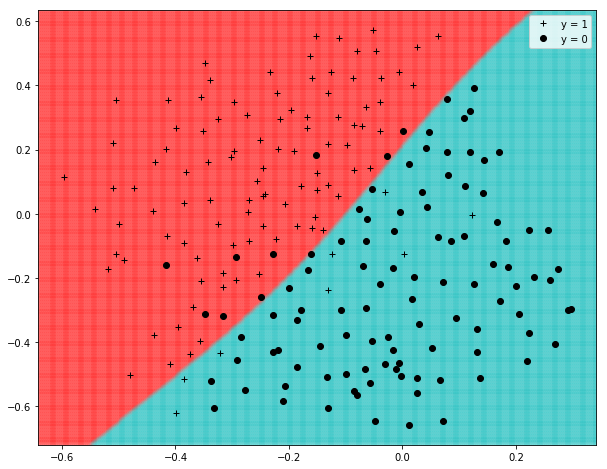

In [11]:
# test best model
print('Found best model with C = %.3f, gamma = %.3f' % best_param)
y_p = best_model.predict(X_test)
acc = compute_accuracy(y_test, y_p)
print('Test accuracy: %.3f%%' % (100 * acc))

# visualize best model
visualize_data(X3, y3)
visualize_svm(best_model, compute_bounds(X3))
plt.show()